# Integración de Monte Carlo

Vamos a calcular el área bajo la curva para $f(x) =  x^{3/4}, 0 < x < 2$

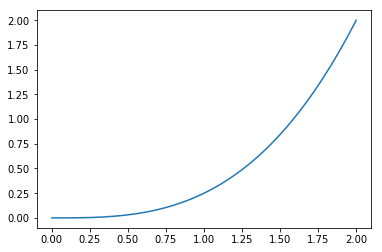

El área es: 1.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Graficamos la función

def f(x):
    return x**3/4;  # evaluamos fx


x = np.linspace(0, 2, 100)  # Rango para la variable x
fx = f(x)  # Evaluamos f(x)
plt.plot(x, fx); plt.show()  # Graficamos x, fx
plt.show()
# Calculamos el área por integración númerica usando la regla del trapecio
# Usamos trapz(y, x) implementada en numpy
area = round(np.trapz(fx, x),2)
print("El área es:", area)

# El área es uno, es una función de densidad de probabilidad válida

### Numerical integration 

- Rectangle rule

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/640px-Integration_rectangle.svg.png)

$$
A = \sum_i f(x_i) \Delta x
$$

- Trapezoidal rule: 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/640px-Integration_trapezoid.svg.png)

- See: https://en.wikipedia.org/wiki/Numerical_integration

Area para n=10 es 0.347011580589
Area para n=100 es 1.05708530709


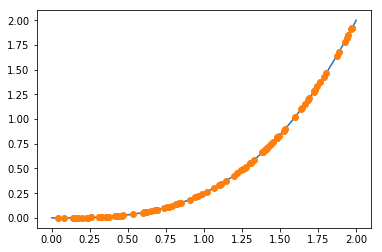

In [2]:
# Calcularemos el área bajo la curva usando Montecarlo
# Usando el método de sampling

# Obtenemos una muestra en el intervalo (a, b) = (0, 2)
# para nuestro ejemplo arriba


def realizar_muestra(a, b, n=10):
    """
    a, b: intervalo
    n: tamaño de la muestra
    """
    return np.random.rand(n)*(b - a) + a


def evaluar_fx_muestra(m):
    """
    m: muestra (array)
    evaluamos la función f definida arriba
    """
    return f(m)


# Calcularemos el área para diferentes tamaños de muestra
# haremos una muestra en el intervalo (a, b) para cada tamaño 
# Evaluaremos esta muestra en la función 
# El area se calcula como: Area = (b-a)/n * sum_i(f_xi)

(a, b) = (0, 2) 

t_muestras = [10, 100]  # diferentes valores de n

for t in t_muestras:
    x_m = realizar_muestra(a, b, t)
    f_m = evaluar_fx_muestra(x_m)    
    area = (b-a)*sum(f_m)/t
    print("Area para n="+str(t), "es", area)
    
# Recuerde que la muestra es aleatorio (estos valores cambiarán en cada ejecución)

# Veamos gráficamente lo que hemos hecho
# el tamaño de x_m, f_m corresponde al último valor en t_muestras
plt.plot(x, fx)  # Graficamos x, fx
plt.plot(x_m, f_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.show()

### Calcularemos el área bajo la curva usando Montecarlo usando el método hit and miss

- El cuadrado a, b, 0, c contiene la curva bajo la cual queremos calcular el área

- Generaremos puntos aleatorios x_r y y_r en los límite de X: a, b  y los límites en Y: 0, c, respectivamente

- Comprobamos si este punto (x_r, y_r), está dentro del área de interés. (bajo la curva)

Area para n=10 es 0.4
Area para n=100 es 0.72


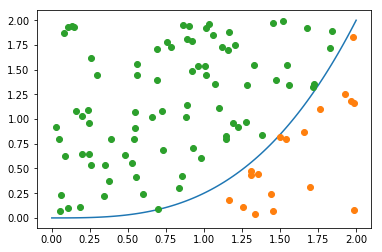

In [3]:
def hit_and_miss(a, b, c, n):
    x_dentro, x_fuera = [], []
    y_dentro, y_fuera = [], []
    
    for i in range(n):
        x_r = realizar_muestra(a, b, 1)  # generamos un solo valor 
        y_r = realizar_muestra(0, c, 1)  # generamos un solo valor
        # Comparamos y_r con f(x_r), para saber si el punto (x_r, y_r)
        # Está dentro del área de interés
        if y_r < f(x_r):  # punto dentro
            x_dentro += [x_r]  # append element to list
            y_dentro += [y_r]  # append element to list
        else:  # punto fuera
            x_fuera += [x_r]  # append element to list
            y_fuera += [y_r]  # append element to list
        
    return x_dentro, y_dentro, x_fuera, y_fuera  # devuelve una tupla con 4 elementos


(a, b, c) = (0, 2, 2)

t_muestras = [10, 100]  # diferentes valores de n, agregue más y vea el resultado

area_cuadrado = (b-a)*c  # Esta area siempre conocemos
# Nosotros dibujamos el cuadrado de tal forma que 
# contenga el área de interés

for t in t_muestras:
    puntos = hit_and_miss(a, b, c, t)
    area = len(puntos[0]) / t * area_cuadrado
    print("Area para n="+str(t), "es", area)
    
plt.plot(x, fx)
plt.plot(puntos[0], puntos[1], 'o')  # Graficamos puntos dentro, 2 primeros elementos de la tupla
plt.plot(puntos[2], puntos[3], 'o')  # Graficamos puntos fuera, 2 últimos elementos de la tupla
plt.show()

### Inverse transform sampling 

Hemos calculado el área para $f(x) = x^3/4$, para $0 < x < 2$.
El área es igual a 1, es una función de densidad de probabilidad
válida.

Las principales distribuciones tienen implementada una función
en numpy, scipy o en R para generar valores aleatorios

Pero si tenemos un caso en que estamos modelando un proceso
estocástico que no sigue ninguna de las distribuciones 
comunes, podemos generar valores aleatorios usando 2 métodos:

- Universalidad de la Uniforme: $X = F^{−1}(U)$.
Si evaluamos una distribución uniform $U(0,1)$
en la inversa de la acumulada $F^{−1}$, obtenemos
una variable aleatoria con cdf $F$.

    - pdf = $x^{3/4}$
    - cdf = $\int_{0}^x t^3/4 dt$
    - cdf = $t^4/16,\ x^4/16 - 0^4/16 = x^4/16$

- Inversa de la cdf:

    - $u=x^4/16$
    - $x=(16*u)^{1/4} = 2*u^{1/4}$

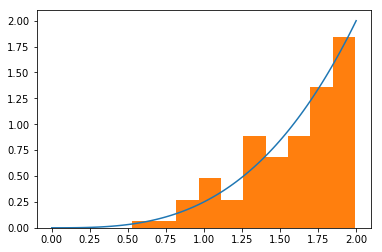

In [4]:
def Finv(n):
    u = np.random.rand(n)
    return 2*u**(1/4)


# Vamos a generar un vector aleatorio 
# usando el método comentado
# vamos a graficar un histograma
# y sobreponer la curva de la distribución

n = 100
x_rvs = Finv(n)

plt.plot(x, fx)
plt.hist(x_rvs, normed=True)
plt.show()

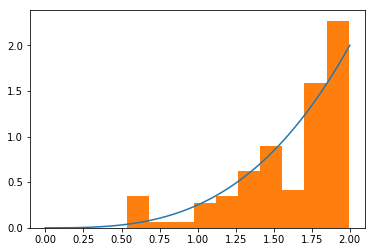

In [5]:
# Qué pasa si no es posible calcular la inversa
# O no es trivial calcularla
# Podemos usar el método de rechazo, 
# que es muy similar al método hit and miss presentado

n = 100

(a, b, c) = (0, 2, 2)

x_rvs = []

i = 0
while i < n:
    x_r = a + (b - a) * np.random.rand()
    y_r = c * np.random.rand()
    if y_r < f(x_r):  # punto dentro (aceptamos)
        x_rvs += [x_r]  # append element to list
        i += 1
        
plt.plot(x, fx)
plt.hist(x_rvs, normed=True)
plt.show()